In [1023]:
# Importing Pandas, Matplot and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Import calendar to get name of months
import calendar

# Loading the Data
humid_df = pd.read_csv('./Dataset/RelativeHumidityMonthlyMean.csv')
rain_df = pd.read_csv('./Dataset/RainfallMonthlyTotal.csv')
temp_df = pd.read_csv('./Dataset/SurfaceAirTemperatureMonthlyMean.csv')
dengue_df = pd.read_csv('./Dataset/WeeklyNumberofDengueandDengueHaemorrhagicFeverCases.csv')

In [1024]:
# See available styles for
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [1025]:
# Set the style for plots
plt.style.use('seaborn-v0_8-darkgrid')

<hr>

# Exploratory Data Analysis
<hr>

### Text Based-Analysis

In [1026]:
# Creating function to get information from data
def get_info(df, name):
    print(60*"*" ,f"\nInformation on the records of Singapore's {name}", '\n' + "*"*60 + '\n') 
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset\n')
    print(f'The names of the columns are')
    for col in df.columns:
        print(f'- {col} ({df[col].dtypes}), na values: {df[col].isna().sum()}, unique values: {len(list(df[col].unique()))}')

In [1027]:
get_info(humid_df, "Humidity")

************************************************************ 
Information on the records of Singapore's Humidity 
************************************************************

There are 501 rows and 2 columns in this dataset

The names of the columns are
- month (object), na values: 0, unique values: 501
- mean_rh (float64), na values: 0, unique values: 142


In [1028]:
get_info(temp_df, "Temperature")

************************************************************ 
Information on the records of Singapore's Temperature 
************************************************************

There are 501 rows and 2 columns in this dataset

The names of the columns are
- month (object), na values: 0, unique values: 501
- mean_temp (float64), na values: 0, unique values: 42


In [1029]:
get_info(rain_df, "Rainfall")

************************************************************ 
Information on the records of Singapore's Rainfall 
************************************************************

There are 501 rows and 2 columns in this dataset

The names of the columns are
- month (object), na values: 0, unique values: 501
- total_rainfall (float64), na values: 0, unique values: 467


In [1030]:
get_info(dengue_df, "Dengue Cases")

************************************************************ 
Information on the records of Singapore's Dengue Cases 
************************************************************

There are 530 rows and 4 columns in this dataset

The names of the columns are
- year (int64), na values: 0, unique values: 5
- eweek (int64), na values: 0, unique values: 53
- type_dengue (object), na values: 0, unique values: 2
- number (float64), na values: 8, unique values: 169


In [1031]:
# Getting the range of year for each dataset
temp_month_range = temp_df.iloc[[0,-1],:-1].values.reshape(1,2)[0]
humid_month_range = humid_df.iloc[[0,-1],:-1].values.reshape(1,2)[0]
rain_month_range = rain_df.iloc[[0,-1],:-1].values.reshape(1,2)[0]
dengue_year_range = dengue_df.iloc[[0,-1],:-1].values.reshape(2,3)
print(f"Range of year for tempature df: {temp_month_range[0]} - {temp_month_range[1]} ")
print(f"Range of year for humid df: {humid_month_range[0]} - {humid_month_range[1]} ")
print(f"Range of year for rain df: {rain_month_range[0]} - {rain_month_range[1]} ")
print(f"Range of year for dengue cases df: {dengue_year_range[0][0]} - {dengue_year_range[1][0]} ")

Range of year for tempature df: 1982-01 - 2023-09 
Range of year for humid df: 1982-01 - 2023-09 
Range of year for rain df: 1982-01 - 2023-09 
Range of year for dengue cases df: 2014 - 2018 


Temperature Dataframe

In [1032]:
temp_df.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


Humidity DataFrame

In [1033]:
humid_df.head()

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


Rainfall DataFrame

In [1034]:
rain_df.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


Dengue DataFrame

In [1035]:
dengue_df.head()

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


### Manipulating Datasets

<u>Manipulating climate related dataset</u>

Since the 3 climate related datasets all have the same number of rows and share the same column 'month' we can easily merge them together.

Merging the datasets with same months together:
<ul>
    <li>Mean Temperature</li>
    <li>Median Rainfall</li>
    <li>Mean Humidity</li>
</ul><br>
As seen from the range of years, dengue dataset only has the years containing 2014-2018, hence we will have to subset our other datasets as well to contain the range of 2014-2018

In [1036]:
# Merging the datasets
humid_temp_df = pd.merge(humid_df, temp_df, on = 'month')
rain_humid_temp_df = pd.merge(humid_temp_df, rain_df, on='month')

# Subsetting the range to 2014-2018
index_of_2014_01 = (rain_humid_temp_df.loc[rain_humid_temp_df['month'] == '2014-01'].index[0])
index_of_2018_12 = (rain_humid_temp_df.loc[rain_humid_temp_df['month'] == '2018-12'].index[0])

# Create new data frame called climate_df
climate_df = rain_humid_temp_df.loc[index_of_2014_01:index_of_2018_12].reset_index(drop=True)

In [1037]:
# First and last month of climate_df
analysis_df.iloc[[0,-1],:]

,month,Mean RH,Mean Temp,Total Rainfall,Dengue Cases,year
0,2014-01,78.5,26.2,75.4,1886.0,2014
59,2018-12,81.5,27.6,172.6,554.0,2018


<u>Manipulating Dengue Dataset</u>

There are some underlying issues with our dataset as seen from our EDA, there are 8 missing values for count column and the dataset is based on weeks rather than months. Hence, we will have to manipulate it such that we can concat our datasets together for easier readibility and plotting

In [1039]:
# Removing DHF from dengue type, using foward fill to replace missing values and reseting the index
filtered_dengue = dengue_df[dengue_df['type_dengue'] == 'Dengue'].drop(dengue_df[['type_dengue']], axis = 1).ffill().reset_index(drop=True)

# Grouping the weeks together such that it is split by it's index equally (This assumes all months have equal days)
grouped_dengue = filtered_dengue.groupby(filtered_dengue.index//(265/60))[['number']].sum()

# Creating a new dataframe for analysis by concatting our Climate Dataframe along with our Dengue Dataframe
analysis_df = pd.concat([climate_df, grouped_dengue], axis=1).reset_index(drop=True)
analysis_df = analysis_df.rename(columns={'number': 'Dengue Cases'})
analysis_df['year'] = pd.to_datetime(analysis_df['month'], format='%Y-%m').dt.year
analysis_df = analysis_df.rename(columns={"mean_rh":"Mean RH",
                        "mean_temp": "Mean Temp",
                        "total_rainfall": "Total Rainfall",
                        "dengue_cases": "Dengue Cases"})

number_of_year = len(analysis_df['year'].unique())


In [1040]:
analysis_df.iloc[list(range(5)) + list(range(-5, 0))]

,month,Mean RH,Mean Temp,Total Rainfall,Dengue Cases,year
0,2014-01,78.5,26.2,75.4,1886.0,2014
1,2014-02,74.5,27.2,0.2,1021.0,2014
2,2014-03,76.0,27.9,66.0,1108.0,2014
3,2014-04,80.0,28.2,110.0,1012.0,2014
4,2014-05,80.2,28.6,125.8,1893.0,2014
55,2018-08,77.0,28.5,121.6,317.0,2018
56,2018-09,77.1,28.0,144.4,203.0,2018
57,2018-10,79.7,27.9,234.4,334.0,2018
58,2018-11,83.2,27.3,169.6,397.0,2018
59,2018-12,81.5,27.6,172.6,554.0,2018


### Visualisation with Matplotlib

Using a historgram to view the distribution of the features in our datafarme

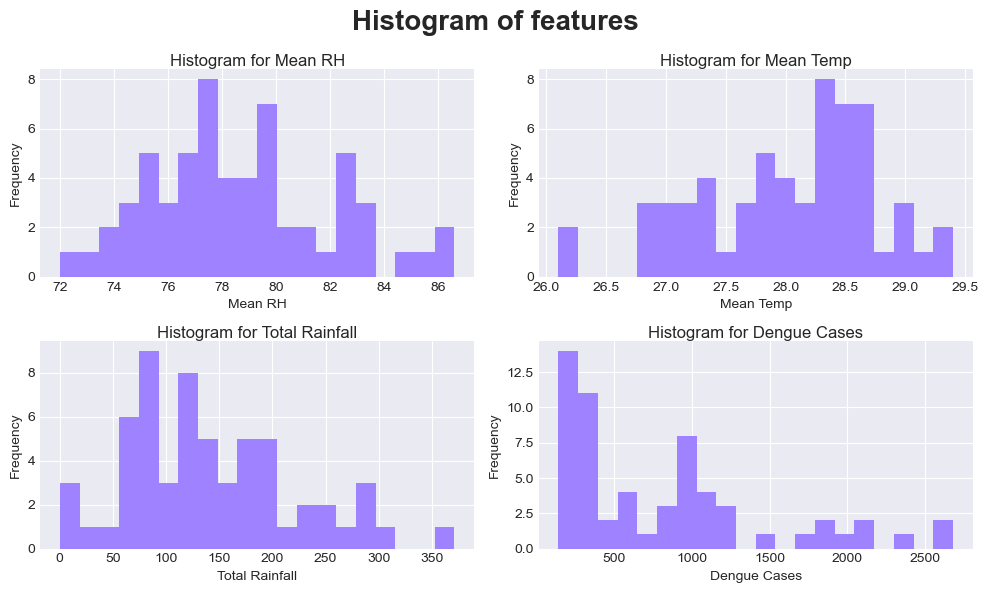

In [1041]:
fig, axs = plt.subplots(2, 2 , tight_layout=False, figsize=(10, 6))

for i, (col, ax) in enumerate(zip(analysis_df.columns[1:], axs.flatten())):
    ax.hist(analysis_df[col], bins=20, color='#9f82ff')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"Histogram for {col}", fontsize=12, pad=0.4)
    
plt.suptitle("Histogram of features", fontsize=20, fontweight='bold')
plt.show()


<u>Observation</u>

It seems that the ditribution for relative humidity is almost symmetrical with the highest frequency of 8 for 77

Looking at rainfall and dengue cases, the graphs are positively-skewed. For rainfall, months usually recieve around 85mm of rainfall and certain months that are outliers recieve higher rainfalls which could be due to moonsoon seasons. Meanwhile, dengue cases frequent at about 0-375 cases, where some outliers cases have cases of over 1500 - 2600, which could be due to dengue outbreaks.

While for the temperature, it is negatively-skewed and most months have a temperatur of about 28.5 degree celsius but there are a few months with lower degree of about 26 degree celsius
<hr>

Understanding our climate data

 it is known that temperature, rainfall and relative humidity related to one another, therefore, by plotting a climograph we are able to observe the trend for these variables over 2014-2018.

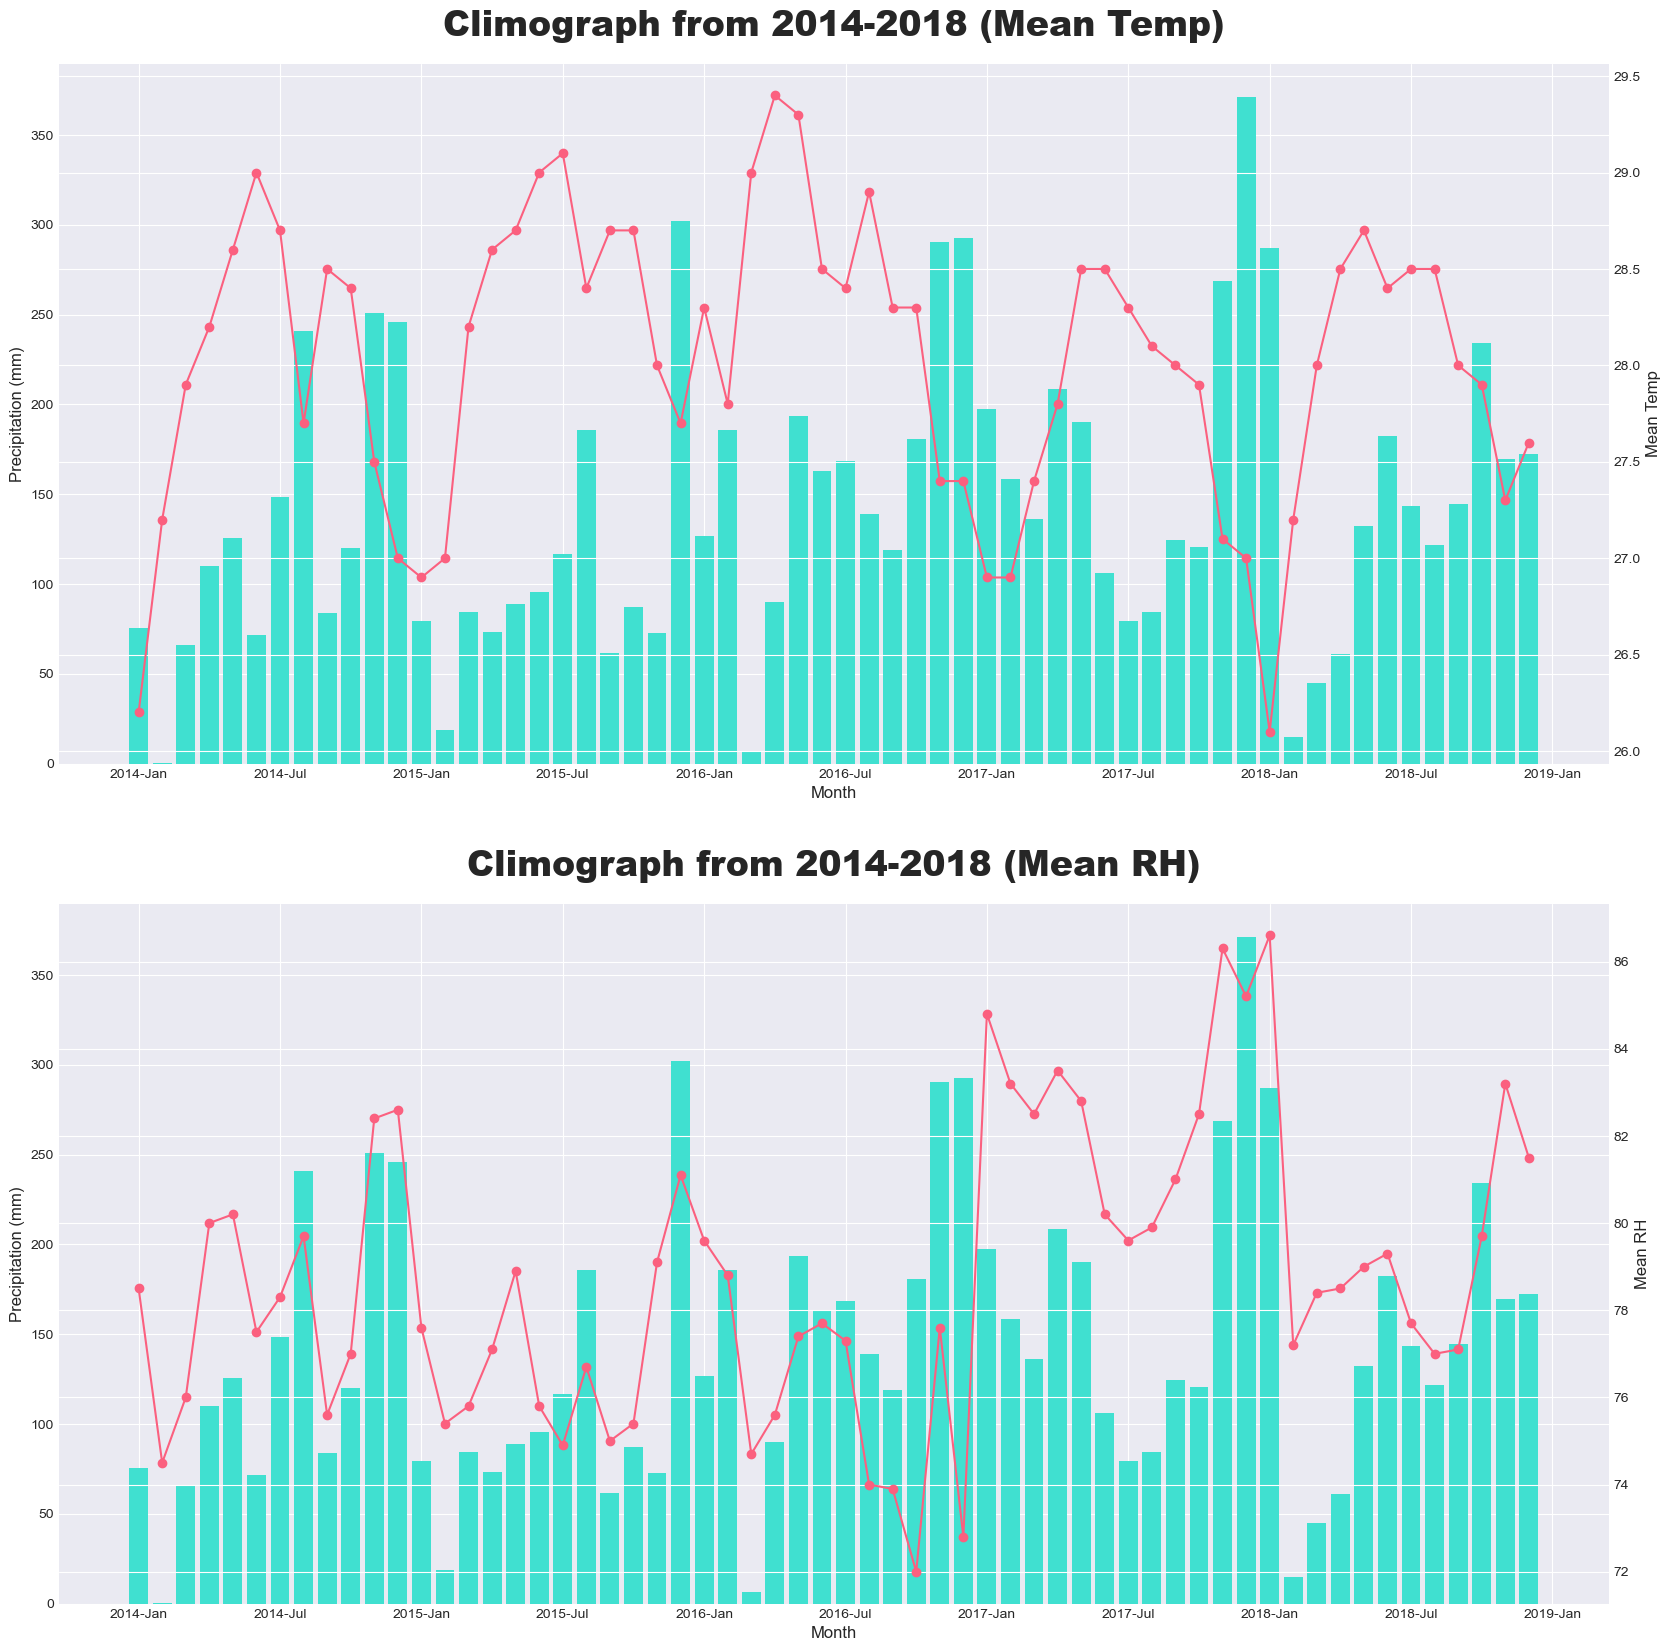

In [1042]:
fig, ax = plt.subplots(2,1,figsize=(20,20))

col_names=['Mean Temp', 'Mean RH']
for i in range(2):
    ax[i].bar(analysis_df['month'].values, analysis_df['Total Rainfall'].values, label ='Precipitation', color='#40e0d0')
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Precipitation (mm)')
    ax[i].tick_params('y')

    ax2 = ax[i].twinx()
    ax2.plot(analysis_df['month'].values, analysis_df[col_names[i]].values, label='col_names', c='#fb607f', marker='o')
    ax2.set_ylabel(col_names[i])

    custom_xtick = np.linspace(0,60,(2019-2014)*2+1)
    custom_xticklabels = []
    for year in range(2014, 2019):
        custom_xticklabels.extend([f'{year}-Jan', f'{year}-Jul'])
    custom_xticklabels.append('2019-Jan')

    ax[i].set_title(f"Climograph from 2014-2018 ({col_names[i]})", fontsize =25, fontweight=b)
    ax[i].set_xticks(custom_xtick)
    ax[i].set_xticklabels(custom_xticklabels)

plt.show()

<u>Observation</u>

A general trend observed is that as total rainfall increases, the mean temperature of the month decreases while for relative humidity, it increase. This suggest a linear relationship between relative humidity and rainfall and an inverse relationship for temperature and rainfall.

The lowest total rainfall recieved was in Feburary in 2014 with amost 0mm and the corresponding temperature and relative humidty were 27.3 degree celsisus and abt 74.5 respectively. While the highest rainfall recieved was in December of 2017 with 375mm of precipitation and in the following month in January 2018 the lowest temperature of 26.1 and highest relative humidty of 86.5 was recorded.

We can also observe that usually, rainfall and relative humidity is highest during the end of the year around December/ January while temparture is usually low during this period. However in 2014, rainfall is highest in the middle of the year in July.

Over the years, there is a general trend where temperature has been increasing, however, there was a drop observed from 2016 to 2017<hr>


<u>Understanding our dengue dataset</u>

We will be plotting a line graph for each year over the epi weeks and observing the trends for dengue cases

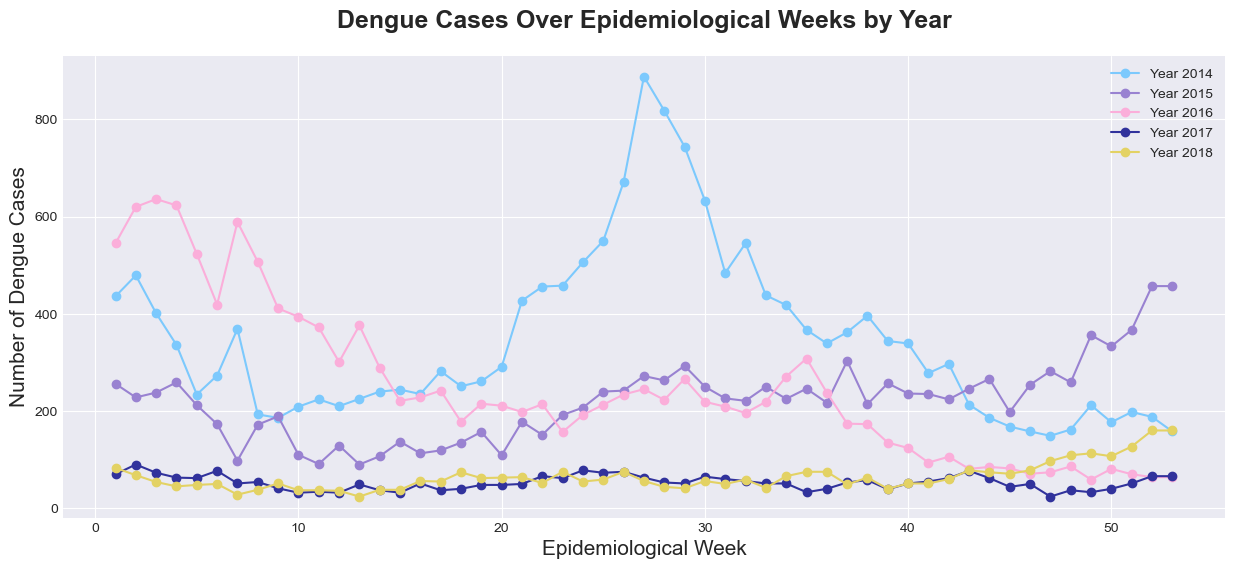

In [1043]:
color = ['#7cc9fd', '#9982d1', '#fbaeda', '#31329c', '#e3d264']

plt.figure(figsize=(15,6))
for i in np.linspace(0, len(filtered_dengue)-53, number_of_year, dtype=int):
    x = filtered_dengue[i:i+53]['eweek']
    y = filtered_dengue[i : i+53]['number']
    plt.plot(x, y, label=f'Year {int(filtered_dengue.iloc[i]["year"])}', marker='o', color= color[int(i/53)])

plt.xlabel('Epidemiological Week', fontsize = '15')
plt.ylabel('Number of Dengue Cases', fontsize = '15')
plt.title('Dengue Cases Over Epidemiological Weeks by Year', fontsize = '18', fontweight ='bold')
plt.legend()
plt.show()



<u>Observation</u>

A general trend observed is that over the years, the number of dengue cases has been reducing which could be due to the efforts of government and its citizen in realsing the threat of dengue mosqitoes and doing wipeouts.

We can see that dengue cases are usually high towards the start and end of the year which observed from our climograph is when rainfall is the highest. There is an anomaly in 2014 where there is a significantly high number of cases in the middle of the year around June/ July which was also where we observed an anomaly in the climograph where the middle of the year also had the highest rainfall.

This could suggest a relationship between rainfall and dengue cases.
<hr>

<u>Looking for correlations between our climate variables and dengue</u>

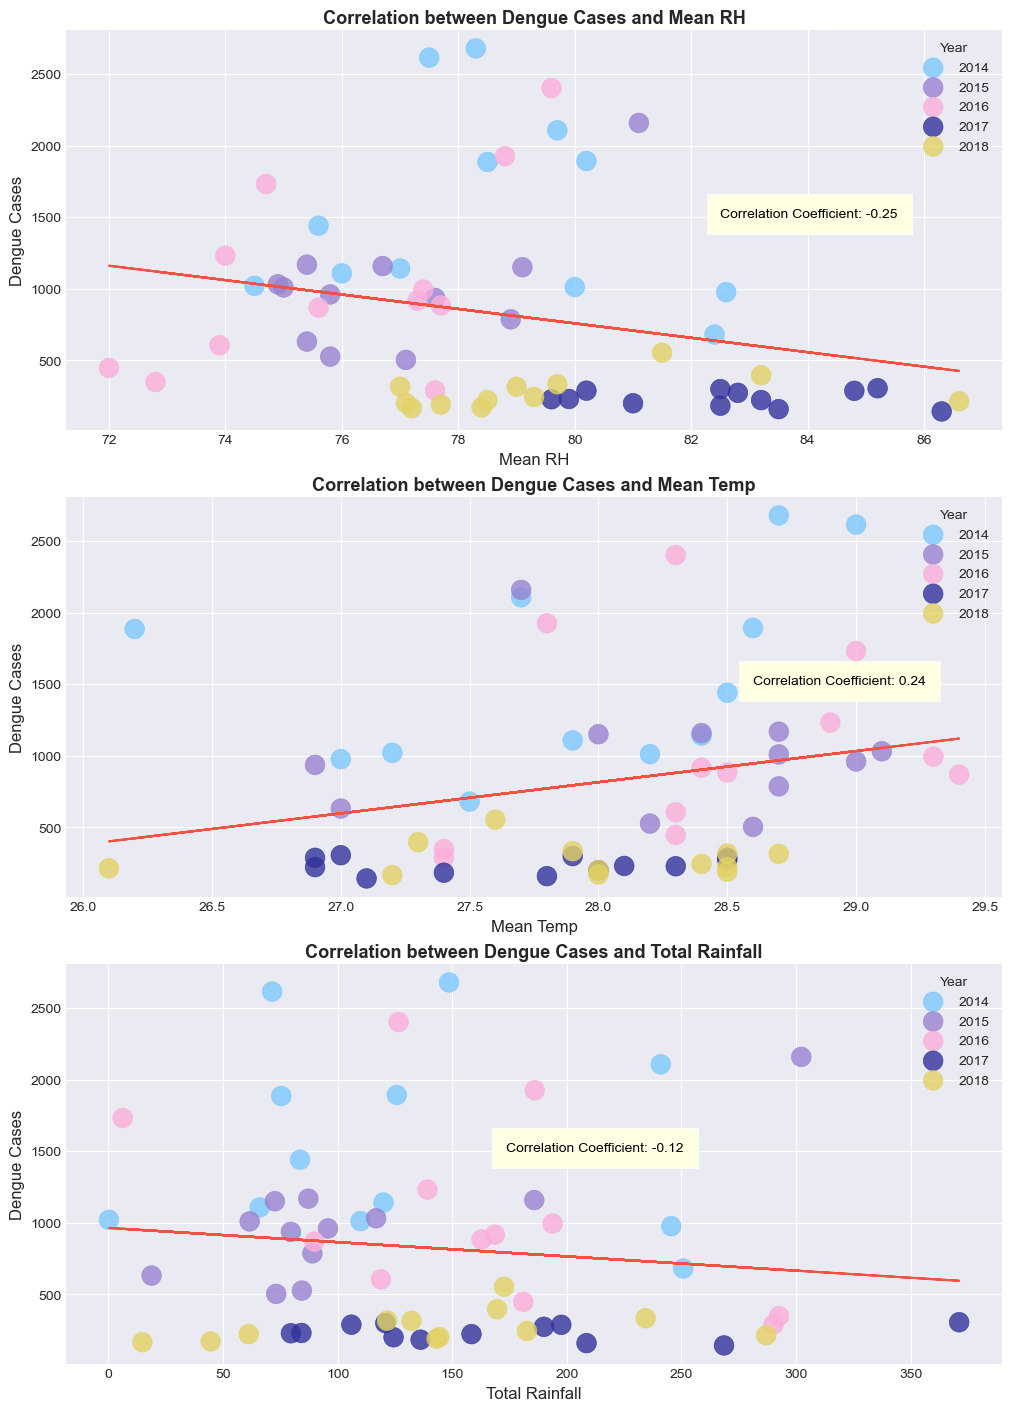

In [1044]:
fig, ax = plt.subplots(3, 1, figsize=(10,14), layout ='constrained')

col_names = analysis_df.iloc[:, 1:-2].columns
colors = analysis_df['year'].apply(lambda x:'#7cc9fd' if x==2014 else
                                            '#9982d1' if x ==2015 else
                                            '#fbaeda' if x==2016 else
                                            '#31329c' if x== 2017 else
                                            '#e3d264')

for i, (col, ax) in enumerate(zip(col_names, ax)):
    custom_legend_entries = []

    for year in analysis_df['year'].unique():
        mask = (analysis_df['year'] == year)
        x = analysis_df.loc[mask, col]
        y = analysis_df.loc[mask, 'Dengue Cases']
        ax.scatter(x, y, label=f'{year}', s=200, alpha=0.8, c=colors[mask])

    ax.legend(handles=custom_legend_entries, title='Year', loc='upper right')   
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Dengue Cases')
    ax.set_title(f'Correlation between Dengue Cases and {col}', fontweight = 'bold', fontsize ='13', pad = '5')

    x = analysis_df[col]
    y = analysis_df['Dengue Cases']

    m,b = np.polyfit(x, y, deg=1)
    ax.plot(x, m*x + b,'#f55141')
    corr_coefficient = np.corrcoef(x, y)[0, 1]
    text_x = x.iloc[-1]
    text_y = y.iloc[-1]
    ax.text(text_x+1, 1500,
            f'Correlation Coefficient: {corr_coefficient:.2f}',
            color='black',
            bbox={'facecolor': '#ffffe3','pad':10}
            )
    ax.legend(title='Year')

plt.show()

<u>Observation</u>

On the contrary to what we observed in our graphs earlier, it seems that there is a weak correlation between our climate variables and the number of dengue cases.

For rainfall and relatiev humidity, there is a negative but weak correlation suggesting that as rainfall/ relative humidity decreases, dengue cases increase. While the oppostie is true for dengue where althought there is still a weak correlation is is positive suggesting that as temperature increase, the number of cases increases as well.

There a some reason why this may be unreliable such as:
<ul>
    <li>There are other factors affecting dengue cases in a given month</li>
    <li>There are outliers which causes the correlation to drop</li>
    <li>Our data has mutated due to the change from weeks to month</li>
    <li>As we are plotting for multiple years, certain years that have lesser dengue cases and may not give a true represntation of the relationship between the years</li>
</ul>
<hr>

<u>Looking for correlation by year</u>

Since one of the reasons that there could be little correlation is that we are plotting for multiple years, we will be looking at the correlation coefficient of each year.

In [1045]:
results = []
for i in np.linspace(0, len(analysis_df)-12, number_of_year, dtype=int):
    temp_df = analysis_df[i:i+12]
    
    for i, col in enumerate(col_names):
        x = temp_df[col]
        y = temp_df['Dengue Cases']
        corr_coefficient = round(np.corrcoef(x, y)[0, 1],2)
        results.append(corr_coefficient)

results_df = pd.DataFrame(np.array(results).reshape(5,3), columns=col_names, index=analysis_df['year'].unique())
results_df = pd.concat([results_df, pd.DataFrame([round(results_df.mean(),2)], index=['Mean'])])

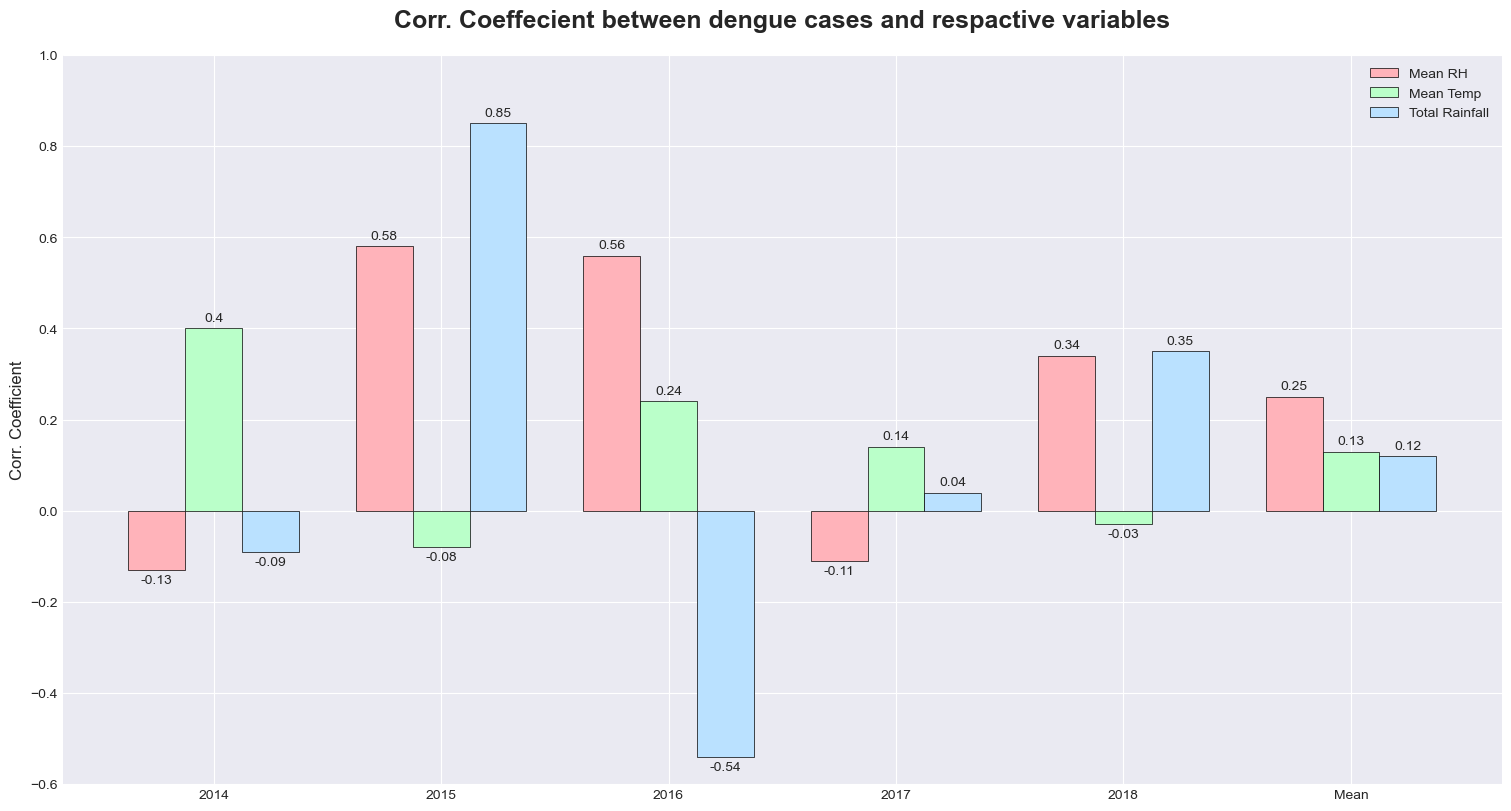

In [1046]:
x = np.arange(len(results_df))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
colors = ['#ffb3ba', '#baffc9', '#bae1ff']

fig, ax = plt.subplots(figsize = (15,8), layout='constrained')

for i, col in enumerate(results_df):
    offset = width * multiplier
    rects = ax.bar(x + offset, list(results_df[col]), width, label=col, edgecolor = 'black', color = colors[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Corr. Coefficient')
ax.set_title('Corr. Coeffecient between dengue cases and respactive variables', fontsize='18', fontweight='bold')
ax.set_xticks(x + width, results_df.index)
ax.legend()
ax.set_ylim(-0.6, 1)

plt.show()

<u>Observation</u>

It seems correlation coeffecient is inconsistent throughout the years, which either confirms that there isn't any relationship or there other underlying issues.
<hr>

<u>Looking at our dataset by year</u>

By grouping the dataset into months, we might be able to see a clearer trend if our dataset has mutated

Creating box plot to look at dengue cases over the months:

In [1047]:
# Grouping the dataset by months
grouped_months = analysis_df.copy()
grouped_months['month'] = pd.to_datetime(analysis_df['month'], format='%Y-%m').dt.month
grouped_months = grouped_months.sort_values(by = 'month')


In [1048]:
# Pivoting the dataset for easier time plotting
rh_months = grouped_months.pivot(index='year', columns='month', values='Mean RH')
temp_months = grouped_months.pivot(index='year', columns='month', values='Mean Temp')
rf_months = grouped_months.pivot(index='year', columns='month', values='Total Rainfall')
dengue_months = grouped_months.pivot(index='year', columns='month', values='Dengue Cases') 

Before pivot:

In [1049]:
grouped_months.head()

,month,Mean RH,Mean Temp,Total Rainfall,Dengue Cases,year
0,1,78.5,26.2,75.4,1886.0,2014
24,1,79.6,28.3,126.6,2402.0,2016
36,1,84.8,26.9,197.6,288.0,2017
12,1,77.6,26.9,79.6,937.0,2015
48,1,86.6,26.1,287.0,215.0,2018


After pivot:

In [1050]:
dengue_months

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,1886.0,1021.0,1108.0,1012.0,1893.0,2615.0,2679.0,2107.0,1441.0,1142.0,681.0,977.0
2015,937.0,632.0,527.0,504.0,787.0,961.0,1032.0,1159.0,1010.0,1169.0,1151.0,2159.0
2016,2402.0,1926.0,1732.0,869.0,995.0,884.0,917.0,1232.0,606.0,448.0,290.0,349.0
2017,288.0,223.0,184.0,160.0,274.0,289.0,229.0,231.0,201.0,300.0,144.0,306.0
2018,215.0,167.0,172.0,223.0,316.0,245.0,191.0,317.0,203.0,334.0,397.0,554.0


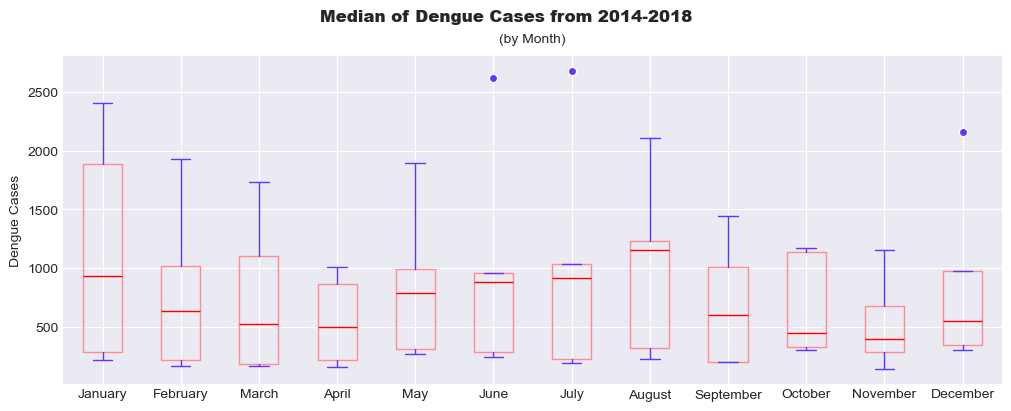

In [1051]:
month_name = calendar.month_name[1:]

fig, ax = plt.subplots(figsize = (10,4), layout='constrained')
ax.boxplot(dengue_months,
            boxprops= dict(color = '#ff8b94'), 
            flierprops=dict(marker='o', markerfacecolor='#6235ff',), 
            medianprops=dict(color='red'),
            capprops=dict(color='#6235ff'),
            whiskerprops=dict(color='#6235ff'))

plt.suptitle("Median of Dengue Cases from 2014-2018", fontweight=b)
ax.set_title("(by Month)", fontsize=10, pad=10, fontweight='light')
ax.set_ylabel("Dengue Cases", fontsize=10)
ax.set_xticklabels(month_name)
plt.show()

<u>Observation</u>

We can observe that out of all the months, August and January the has the highest median number of cases of 1250, and 900 respectively, while the lowest was recorded in November and October of about 400 each.
<hr>

Looking at climograph by Month

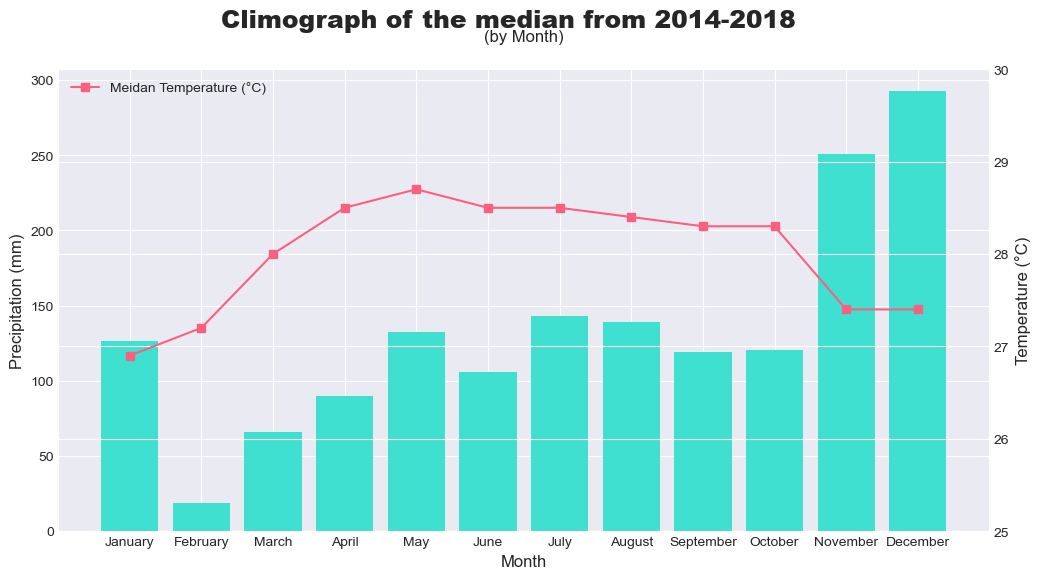

In [1052]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(month_name, list(rf_months.median()),
        label ='Precipitation', color='#40e0d0')
ax1.set_xlabel('Month')
ax1.set_ylabel('Precipitation (mm)')
ax1.tick_params('y')

ax2 = ax1.twinx()
ax2.plot(month_name, list(temp_months.median()),
         label= 'Meidan Temperature (°C)',
          c = '#fb607f', marker='s')
ax2.set_ylabel("Temperature (°C)")
ax2.set_ylim(25,30)

plt.suptitle("Climograph of the median from 2014-2018",
             fontsize =18, fontweight=b)
ax1.set_title("(by Month)", fontsize=12)

plt.legend(loc='upper left')
plt.show()

<u>Observation</u>

The highest ranfall experiecned was in December with 300mm while lowest experienced was in Feburary with about 20mm while lowest temperatrure was in Janurary with about 27 degree and highest in May with about 28.5 degrees.

The fact the one of the highest number of cases was in January and the highest amount of rainfall collected was in the month before in December, suggesting that our theory at the start that there is a relationship between rainfall and dengue cases is true.

<hr>

### Summary
<hr>


### Results
Overall, from our graphs, we can see that there is a high chance that there is an increase in dengue cases as there is more rainfall. Although we couldn’t find much correlation between temperature and relative humidity, since these variables are closely related to rainfall, we can assume that as temperature decrease dengue cases increase while as relative humidity increase, dengue increases.

This shows that during periods with high rainfall which happen typically towards the start/end of the year, Singapore experiences the monsoon season, we should take more precautions towards dengue to try and minimize them from breeding and causing more cases.

We can also see that as years go by, the number of dengue cases has decreased despite a general increase in both rainfall and temperature, this is especially true after 2014 which is when a dengue outbreak occurred causing Singapore to take more precautions the following years which has proven to be making an impact. 

### Issues
There are several problems when dealing with the dataset, the biggest problem was when I was trying to convert epi weeks into months, and even after finding a possible solution, it may have impacted the actual representation of our data and the correlations.


### Takeaways
This assessment has taught me the importance of finding good datasets that are relatable and how to manipulate them.

It also gave me a deeper understanding of how to use Matplotlib as there were many things that I found out when researching how to plot graphs which I would not have found out if I only looked at the syllabus.

Overall, it was really fun trying to explore and having to find ways to deal with the dataset


Referrences:

Dengue outbreak:
Auto, H. (2021) Dengue cases approaching record high in Singapore as infections continue to soar, The Straits Times. Available at: https://www.straitstimes.com/singapore/health/dengue-cases-likely-to-hit-a-record-high-this-week-as-infections-continue-to-soar (Accessed: 14 December 2023). 

Weather:
Climate of Singapore (no date) Climate of Singapore |. Available at: https://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Seasons,Monsoon%20from%20June%20to%20September. (Accessed: 14 December 2023). 